In [0]:
#Multiple Linear Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('processed.csv')
except:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
# print(dataset)

X = dataset.iloc[:,2:] #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1]

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import required libraries and create pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

print('starting pipeline')

lr_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('LR', LinearRegression())
                     ], verbose=True)

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

print(y_pred)
print(y_test)
print(mean_squared_error(y_test, y_pred))

starting pipeline
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.6s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   3.5s
[2.85932719 4.0153248  3.90359306 ... 4.14138205 3.95396876 3.45497342]
85971     3.113943
205804    4.037426
13374     3.913814
235012    4.041393
169522    3.060698
            ...   
16494     3.653213
259055    3.397940
24516     4.107210
13263     3.875061
25001     3.544068
Name: log_price, Length: 81600, dtype: float64
0.06779693364579975


In [5]:
print(10**y_pred)
print(10**y_test)
print(mean_squared_error(10**y_test, 10**y_pred))

[  723.31453045 10359.16613224  8009.27232257 ... 13847.84041978
  8994.32877639  2850.84375044]
85971      1300.0
205804    10900.0
13374      8200.0
235012    11000.0
169522     1150.0
           ...   
16494      4500.0
259055     2500.0
24516     12800.0
13263      7500.0
25001      3500.0
Name: log_price, Length: 81600, dtype: float64
232717125.6909711


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


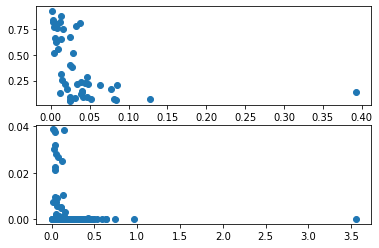

In [6]:
#Backward Elimination
import statsmodels.api as sm
X_cols = X.columns
X_withconstant = np.append(arr=np.ones((271997,1)).astype(int), values=X, axis=1)

X_sig = X_withconstant
obj_OLS = sm.OLS(endog = y, exog = X_sig).fit()

# scatterplot to evaluate if sklearn.model_feature_selection.RFECV
# which drops the lowest coefficients is giving similar results

#filter on p > 0.05 (likely to be dropped)
coefficients = abs(obj_OLS.params[obj_OLS.pvalues > 0.05])
p_values = obj_OLS.pvalues[obj_OLS.pvalues > 0.05]
plt.subplot(211)
plt.scatter(coefficients, p_values)

#filter on p < 0.05 (likely to keep)
coefficients2 = abs(obj_OLS.params[obj_OLS.pvalues < 0.05])
p_values2 = obj_OLS.pvalues[obj_OLS.pvalues < 0.05]
plt.subplot(212)
plt.scatter(coefficients2, p_values2)

In [7]:
# Loop to remove p > 0.05 recursively
p_value = 1
while p_value > 0.05:
  obj_OLS = sm.OLS(endog = y, exog = X_sig).fit()
  p_value = np.max(obj_OLS.pvalues)
  p_index = np.argmax(obj_OLS.pvalues)
  print("Dropped column at index ", p_index, " with name", X_cols[p_index])
  X_cols = np.delete(X_cols, p_index)
  X_sig = np.delete(X_sig, p_index, 1)

print("Final shape", X_sig.shape)

Dropped column at index  294  with name model_vivaro
Dropped column at index  193  with name model_kuga
Dropped column at index  62  with name model_1er
Dropped column at index  199  with name model_lupo
Dropped column at index  250  with name model_sandero
Dropped column at index  11  with name brand_daewoo
Dropped column at index  54  with name fuelType_hybrid
Dropped column at index  130  with name model_clk
Dropped column at index  278  with name model_v40
Dropped column at index  173  with name model_i_reihe
Dropped column at index  281  with name model_vectra
Dropped column at index  21  with name brand_land_rover
Dropped column at index  196  with name model_m_reihe
Dropped column at index  142  with name model_delta
Dropped column at index  132  with name model_cooper
Dropped column at index  217  with name model_phaeton
Dropped column at index  20  with name brand_lancia
Dropped column at index  124  with name model_citigo
Dropped column at index  137  with name model_cx_reihe

In [8]:
#Splitting the data into Training Set and Test Set
X_sig_train, X_sig_test, y_sig_train, y_sig_test = train_test_split(X_sig, y, test_size=0.2,random_state=0)

# Import required libraries and create pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

print('starting pipeline')

lr_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('LR', LinearRegression())
                     ], verbose=True)

lr_pipeline.fit(X_sig_train, y_sig_train)
y_sig_pred = lr_pipeline.predict(X_sig_test)

print(y_sig_pred)
print(y_test)
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_sig_test, y_sig_pred))
print(mean_squared_error(10**y_test, 10**y_pred))
print(mean_squared_error(10**y_sig_test, 10**y_sig_pred))

starting pipeline
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   4.5s
[2.86304988 4.01560928 3.90240744 ... 4.46237258 3.69146352 3.3384798 ]
85971     3.113943
205804    4.037426
13374     3.913814
235012    4.041393
169522    3.060698
            ...   
16494     3.653213
259055    3.397940
24516     4.107210
13263     3.875061
25001     3.544068
Name: log_price, Length: 81600, dtype: float64
0.06779693364579975
0.06695273751429334
232717125.6909711
114938853.19178033


In [31]:
lr_pipeline.fit(X_sig_train, y_sig_train)
y_sig_pred = lr_pipeline.predict(X_sig_test)

[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.5s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   4.2s


In [9]:
# store boolean mask of removed variables
mask = [True if item in X_cols.to_list() else False for item in X.columns.to_list()]
print(mask)

[True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True,

In [0]:
# Copy of previous output
mask = [True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, False, True, True, False, True, True, True, True, True, False, True, True, True, False, False, True, True, True, True, True, False, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True]
#On new runtime, fetch selected columns using the mask
df = X.iloc[:, mask]

In [36]:
#sorted coefficients and columns
coefficient_arr = lr_pipeline.named_steps.LR.coef_
# print(coefficient_arr)
column_coef = dict(zip(df.columns, coefficient_arr))
# print(column_coef)
print({k: v for k, v in sorted(column_coef.items(), key=lambda item: item[1])})

{'monthOfRegistration': -0.13703381765543526, 'brand_audi': -0.09566777062217868, 'brand_jaguar': -0.0254438610762076, 'brand_honda': -0.023097224466012825, 'brand_dacia': -0.02112448343020805, 'brand_porsche': -0.020902098812606337, 'brand_ford': -0.020450345566747366, 'brand_lada': -0.020275242524632753, 'brand_mercedes_benz': -0.02021296941133094, 'brand_smart': -0.01874934600155727, 'model_accord': -0.017599678940934782, 'powerPS': -0.016040686907168276, 'brand_nissan': -0.01578606602404881, 'model_one': -0.01380578905165904, 'model_c_max': -0.013660745316566494, 'model_verso': -0.013028164971148622, 'brand_citroen': -0.012753327450110041, 'brand_saab': -0.010899960198760245, 'brand_skoda': -0.01080643161022074, 'brand_toyota': -0.010790027620523895, 'brand_daihatsu': -0.01019035014127126, 'model_fusion': -0.010161901769107345, 'model_primera': -0.01000782334319128, 'model_kadett': -0.009847757513856626, 'model_cordoba': -0.009407671176087973, 'brand_fiat': -0.009168838912092327, '

In [11]:
#Loop for counting brand and model variables
column_list = df.columns.tolist()
model_cnt = 0
brand_cnt = 0
total_cnt = 0

for item in column_list:
  if item.startswith('model'):
    model_cnt += 1
  elif item.startswith('brand'):
    brand_cnt += 1
  total_cnt +=1
print('models: ', model_cnt)
print('brands: ', brand_cnt)
print('total: ', total_cnt)

models:  215
brands:  31
total:  264
